## Kaplan-Meier plots including log rank test

In [ ]:
install.packages("survminer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Matrix’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘markdown’, ‘png’, ‘jpeg’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘exactRankTests’, ‘mvtnorm’, ‘KMsurv’, ‘zoo’, ‘km.ci’, ‘xtable’, ‘gridtext’, ‘ggpubr’, ‘gridExtra’, ‘maxstat’, ‘survMisc’, ‘ggtext’




In [ ]:
library(survival)
library(survminer)

Loading required package: ggplot2

Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma




## TCGA training set

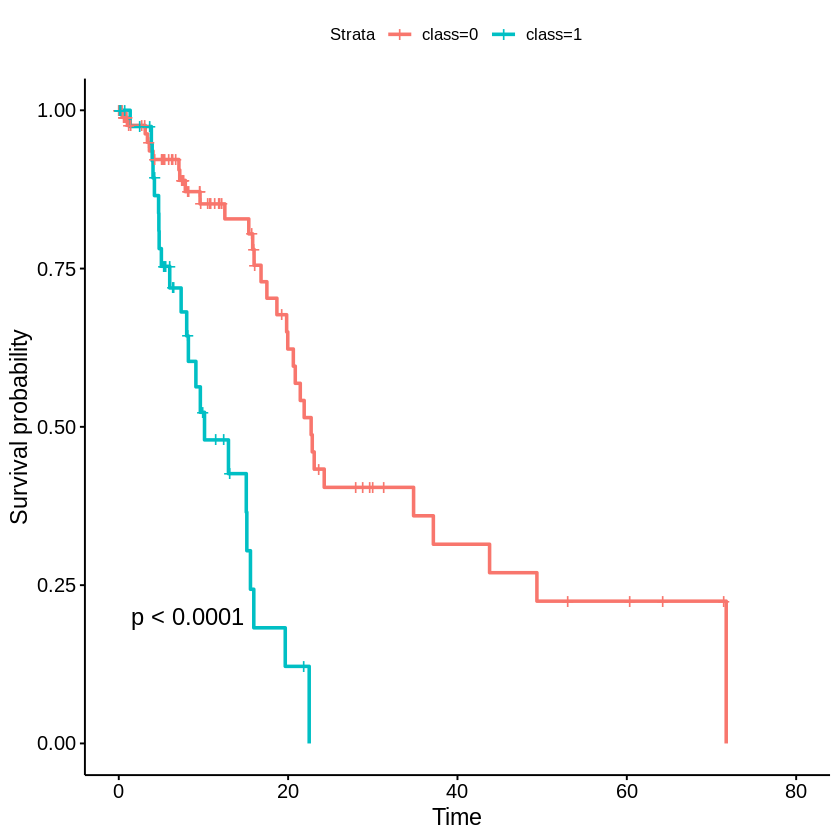

In [ ]:
dataset <- read.table('clinical_data3.csv', sep = ',', header=TRUE)

cox_model = survfit(Surv(survival, vital_status) ~ class, dataset)
ggsurvplot(cox_model , data = dataset, pval = TRUE)

## mRNA seq

In [ ]:
labels_variance <- read.table('rna_Variance_SVM_pred.csv', sep = ',', header=TRUE)
labels_selectfdr <- read.table('rna_Selectfdr_SVM_pred.csv', sep = ',', header=TRUE)
labels_rfecv <- read.table('rna_RFECV_SVM_pred.csv', sep = ',', header=TRUE)

labels_lr <- read.table('rna_Selectfdr_LR_pred.csv', sep = ',', header=TRUE)
labels_ann <- read.table('rna_Selectfdr_ANN_pred.csv', sep = ',', header=TRUE)

clinical_rna <- read.table('rna_cli_logrank.csv', sep = ',', header=TRUE)

clinical_rna$labelsv <- labels_variance$Predicted
clinical_rna$labelss <- labels_selectfdr$Predicted
clinical_rna$labelsr <- labels_rfecv$Predicted
clinical_rna$labelslr <- labels_lr$Predicted
clinical_rna$labelsann <- labels_ann$X0

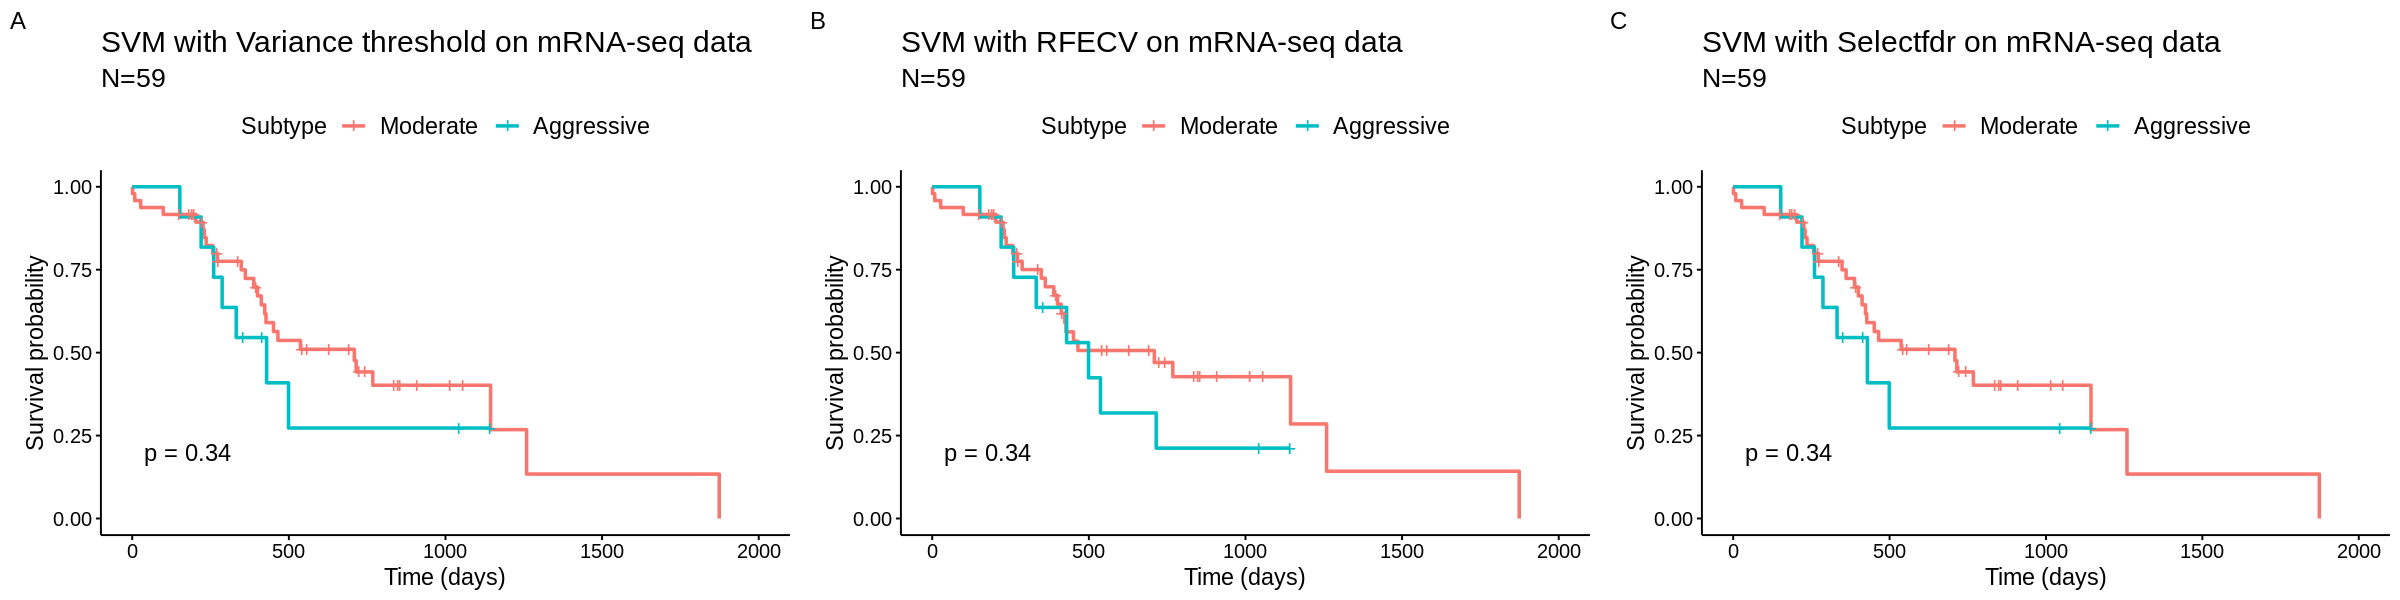

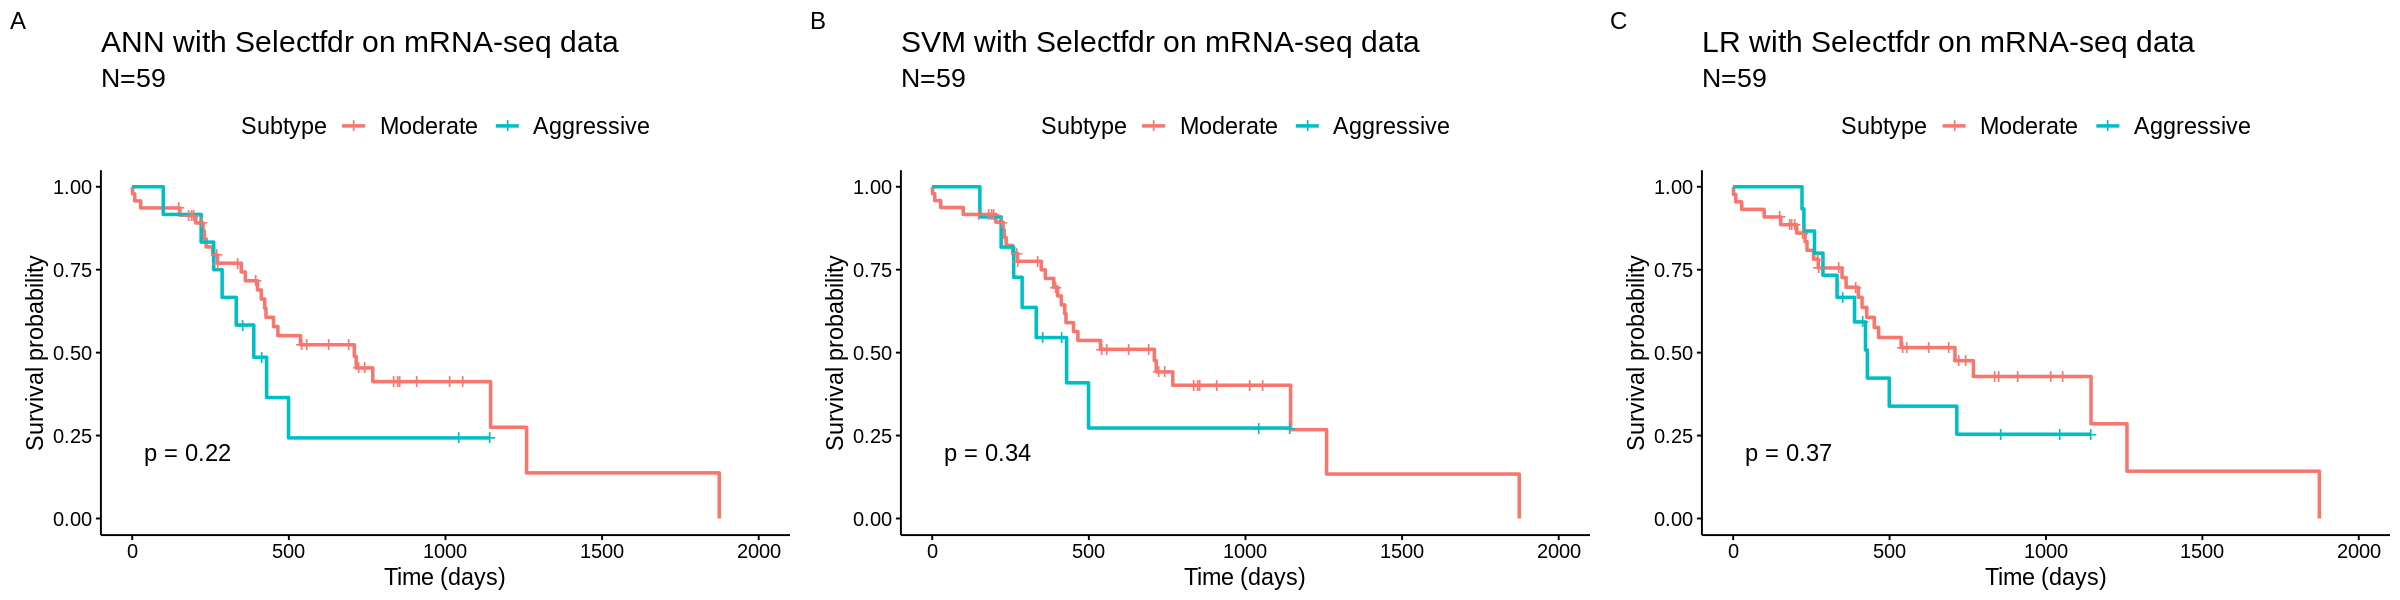

In [ ]:
options(repr.plot.width=20, repr.plot.height =5)
cox_model1 = survfit(Surv(donor_survival_time, donor_vital_status) ~ labelsv, clinical_rna)
cox_model2 = survfit(Surv(donor_survival_time, donor_vital_status) ~ labelss, clinical_rna)
cox_model3 = survfit(Surv(donor_survival_time, donor_vital_status) ~ labelsr, clinical_rna)

cox_model4 = survfit(Surv(donor_survival_time, donor_vital_status) ~ labelslr, clinical_rna)
cox_model5 = survfit(Surv(donor_survival_time, donor_vital_status) ~ labelsann, clinical_rna)

splots <- list()

splots[[1]] <- ggsurvplot(cox_model1 , data = clinical_rna, pval = TRUE, legend.labs=c("Moderate", "Aggressive"), legend.title="Subtype", font.legend=14, font.x=14, font.y=14, font.title=18, font.subtitle=16, xlab='Time (days)', subtitle='N=59', title="SVM with Variance threshold on mRNA-seq data") + labs(tag='A')
splots[[2]] <- ggsurvplot(cox_model3 , data = clinical_rna, pval = TRUE, legend.labs=c("Moderate", "Aggressive"), legend.title="Subtype", font.legend=14, font.x=14, font.y=14, font.title=18, font.subtitle=16, xlab='Time (days)', subtitle='N=59', title="SVM with RFECV on mRNA-seq data") + labs(tag='B')
splots[[3]] <- ggsurvplot(cox_model2 , data = clinical_rna, pval = TRUE, legend.labs=c("Moderate", "Aggressive"), legend.title="Subtype", font.legend=14, font.x=14, font.y=14, font.title=18, font.subtitle=16, xlab='Time (days)', subtitle='N=59', title="SVM with Selectfdr on mRNA-seq data") + labs(tag='C')


# Arrange multiple ggsurvplots and print the output
arrange_ggsurvplots(splots, print = TRUE,
  ncol = 3, nrow = 1)

splots <- list()

splots[[1]] <- ggsurvplot(cox_model5 , data = clinical_rna, pval = TRUE, legend.labs=c("Moderate", "Aggressive"), xlab='Time (days)', font.legend=14, font.x=14, font.y=14, font.title=18, font.subtitle=16, subtitle='N=59', legend.title="Subtype", title="ANN with Selectfdr on mRNA-seq data") + labs(tag='A')
splots[[2]] <- ggsurvplot(cox_model2 , data = clinical_rna, pval = TRUE, legend.labs=c("Moderate", "Aggressive"), font.legend=14, font.x=14, font.y=14, font.title=18, font.subtitle=16, xlab='Time (days)', subtitle='N=59',legend.title="Subtype", title="SVM with Selectfdr on mRNA-seq data") + labs(tag='B')
splots[[3]] <- ggsurvplot(cox_model4 , data = clinical_rna, pval = TRUE, legend.labs=c("Moderate", "Aggressive"), font.legend=14, font.x=14, font.y=14, font.title=18, font.subtitle=16, xlab='Time (days)', subtitle='N=59',legend.title="Subtype", title="LR with Selectfdr on mRNA-seq data") + labs(tag='C')

# Arrange multiple ggsurvplots and print the output
arrange_ggsurvplots(splots, print = TRUE,
  ncol = 3, nrow = 1)

## mRNA array data

In [ ]:
labels_variance <- read.table('array_Variance_SVM_pred.csv', sep = ',', header=TRUE)
labels_selectfdr <- read.table('array_Selectfdr_SVM_pred.csv', sep = ',', header=TRUE)
#labels_rfecv <- read.table('array_RFECV_SVM_pred.csv', sep = ',', header=TRUE)
labels_rfecv <- read.table('arrayRFECV2.csv', sep = ',', header=TRUE)
labels_lr <- read.table('array_Selectfdr_LR_pred.csv', sep = ',', header=TRUE)
labels_ann <- read.table('array_Selectfdr_ANN_pred.csv', sep = ',', header=TRUE)

clinical_array <- read.table('mrna_array_cli_logrank.csv', sep = ',', header=TRUE)

clinical_array$labelsv <- labels_variance$Predicted
clinical_array$labelss <- labels_selectfdr$Predicted
clinical_array$labelsr <- labels_rfecv$Predicted
clinical_array$labelslr <- labels_lr$Predicted
clinical_array$labelsann <- labels_ann$X0

In [ ]:
library(gridExtra)
library(ggplot2)
library(grid)

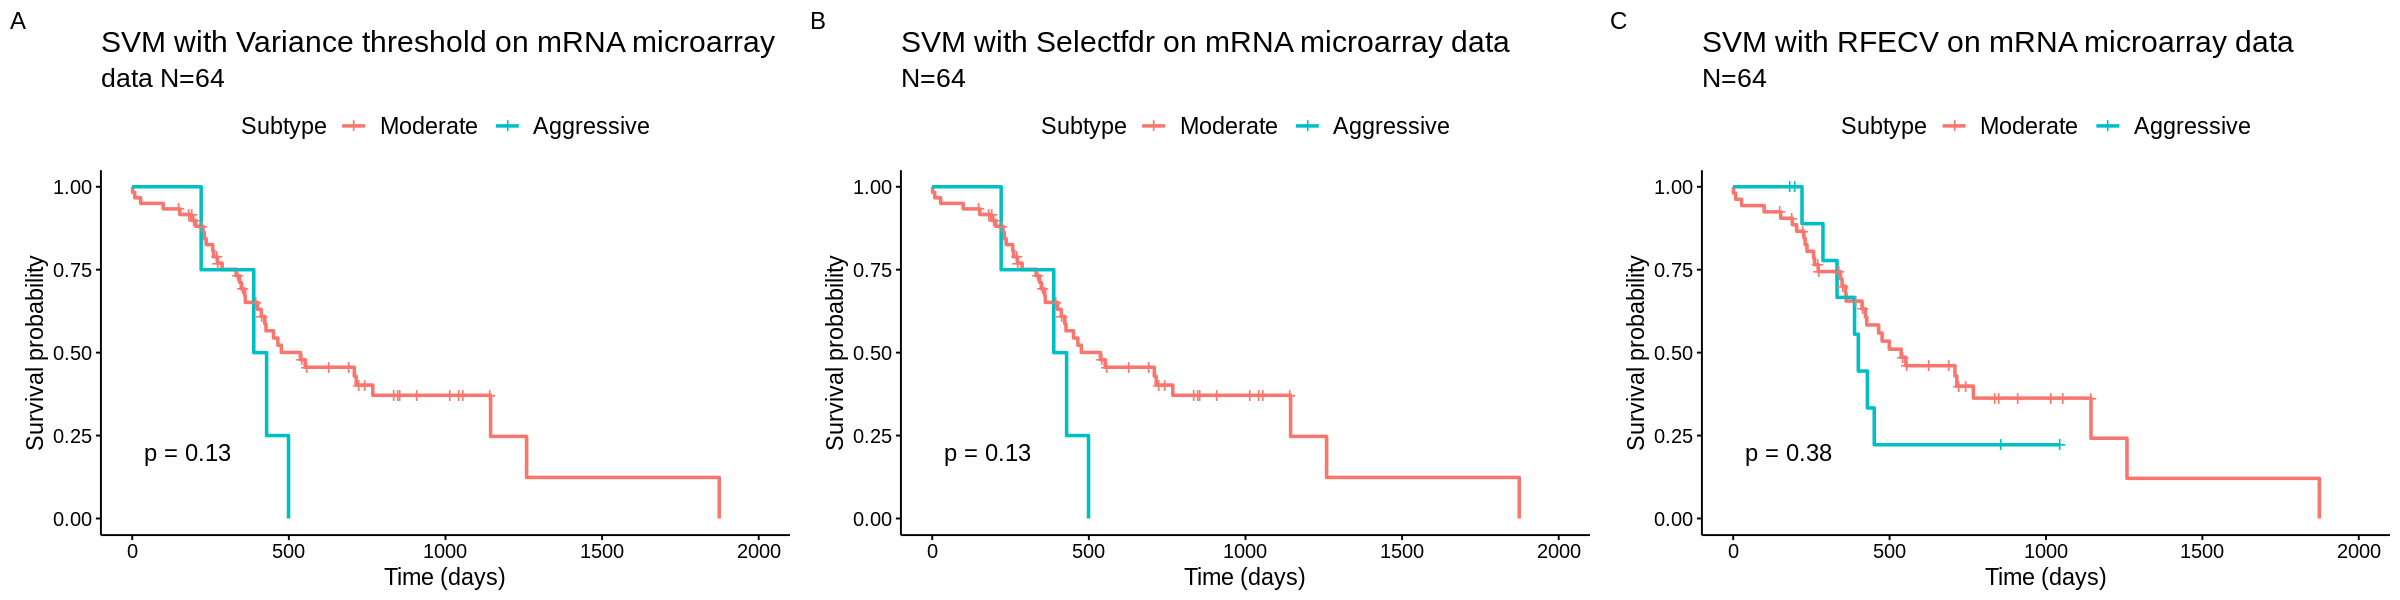

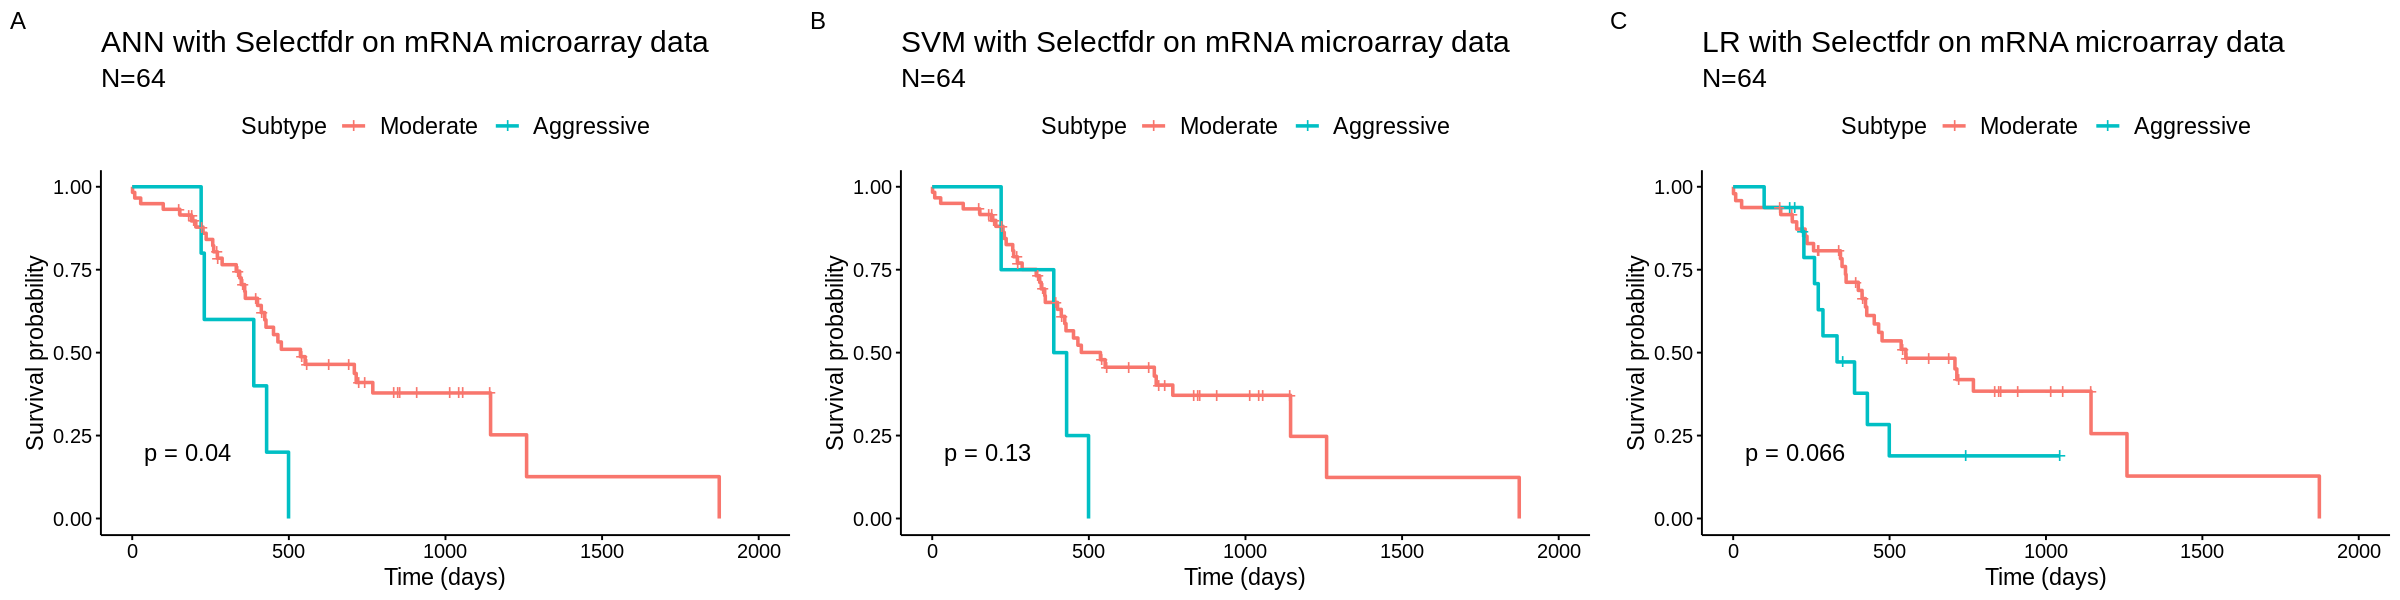

In [ ]:
options(repr.plot.width=20, repr.plot.height =5)
cox_model1 = survfit(Surv(donor_survival_time, donor_vital_status) ~ labelsv, clinical_array)
cox_model2 = survfit(Surv(donor_survival_time, donor_vital_status) ~ labelss, clinical_array)
cox_model3 = survfit(Surv(donor_survival_time, donor_vital_status) ~ labelsr, clinical_array)

cox_model4 = survfit(Surv(donor_survival_time, donor_vital_status) ~ labelslr, clinical_array)
cox_model5 = survfit(Surv(donor_survival_time, donor_vital_status) ~ labelsann, clinical_array)

splots <- list()

splots[[1]] <- ggsurvplot(cox_model1 , data = clinical_array, pval = TRUE, legend.labs=c("Moderate", "Aggressive"), font.legend=14, font.x=14, font.y=14, font.title=18, font.subtitle=16, xlab='Time (days)', subtitle='data N=64', legend.title="Subtype", title="SVM with Variance threshold on mRNA microarray") + labs(tag='A')
splots[[2]] <- ggsurvplot(cox_model2 , data = clinical_array, pval = TRUE, legend.labs=c("Moderate", "Aggressive"), font.legend=14, font.x=14, font.y=14, font.title=18, font.subtitle=16, xlab='Time (days)', subtitle='N=64', legend.title="Subtype", title="SVM with Selectfdr on mRNA microarray data") + labs(tag='B')
splots[[3]] <- ggsurvplot(cox_model3 , data = clinical_array, pval = TRUE, legend.labs=c("Moderate", "Aggressive"), font.legend=14, font.x=14, font.y=14, font.title=18, font.subtitle=16, xlab='Time (days)', subtitle='N=64', legend.title="Subtype", title="SVM with RFECV on mRNA microarray data") + labs(tag='C')
# Arrange multiple ggsurvplots and print the output
arrange_ggsurvplots(splots, print = TRUE,
  ncol = 3, nrow = 1)

splots <- list()
splots[[1]] <- ggsurvplot(cox_model5 , data = clinical_array, pval = TRUE, legend.labs=c("Moderate", "Aggressive"), font.legend=14, font.x=14, font.y=14, font.title=18, font.subtitle=16, xlab='Time (days)', subtitle='N=64', legend.title="Subtype", title="ANN with Selectfdr on mRNA microarray data",) + labs(tag='A')
splots[[2]] <- ggsurvplot(cox_model2 , data = clinical_array, pval = TRUE, legend.labs=c("Moderate", "Aggressive"), font.legend=14, font.x=14, font.y=14, font.title=18, font.subtitle=16, xlab='Time (days)', subtitle='N=64', legend.title="Subtype", title="SVM with Selectfdr on mRNA microarray data") + labs(tag='B')
splots[[3]] <- ggsurvplot(cox_model4 , data = clinical_array, pval = TRUE, legend.labs=c("Moderate", "Aggressive"), font.legend=14, font.x=14, font.y=14, font.title=18, font.subtitle=16, xlab='Time (days)', subtitle='N=64', legend.title="Subtype", title="LR with Selectfdr on mRNA microarray data")+ labs(tag='C')
# Arrange multiple ggsurvplots and print the output
arrange_ggsurvplots(splots, print = TRUE,
  ncol = 3, nrow = 1)


## Methylation array

In [ ]:
labels_variance <- read.table('methy_Variance_SVM_pred.csv', sep = ',', header=TRUE)
labels_selectfdr <- read.table('methy_Selectfdr_SVM_pred.csv', sep = ',', header=TRUE)
labels_rfecv <- read.table('methy_RFECV_SVM_pred.csv', sep = ',', header=TRUE)
labels_lr <- read.table('methy_Selectfdr_LR_pred.csv', sep = ',', header=TRUE)
labels_ann <- read.table('methy_Selectfdr_ANN_pred.csv', sep = ',', header=TRUE)

clinical_array <- read.table('methy_cli_logrank.csv', sep = ',', header=TRUE)
#clinical_array <- clinical_array %>% mutate(donor_survival_time = ((donor_survival_time / 365) * 12))
clinical_array <- clinical_array %>% mutate(donor_vital_status = ((donor_vital_status + 1)))
clinical_array$donor_vital_status <- as.integer(clinical_array$donor_vital_status)

clinical_array$labelsv <- labels_variance$Predicted
clinical_array$labelss <- labels_selectfdr$Predicted
clinical_array$labelsr <- labels_rfecv$Predicted
clinical_array$labelslr <- labels_lr$Predicted
clinical_array$labelsann <- labels_ann$X0


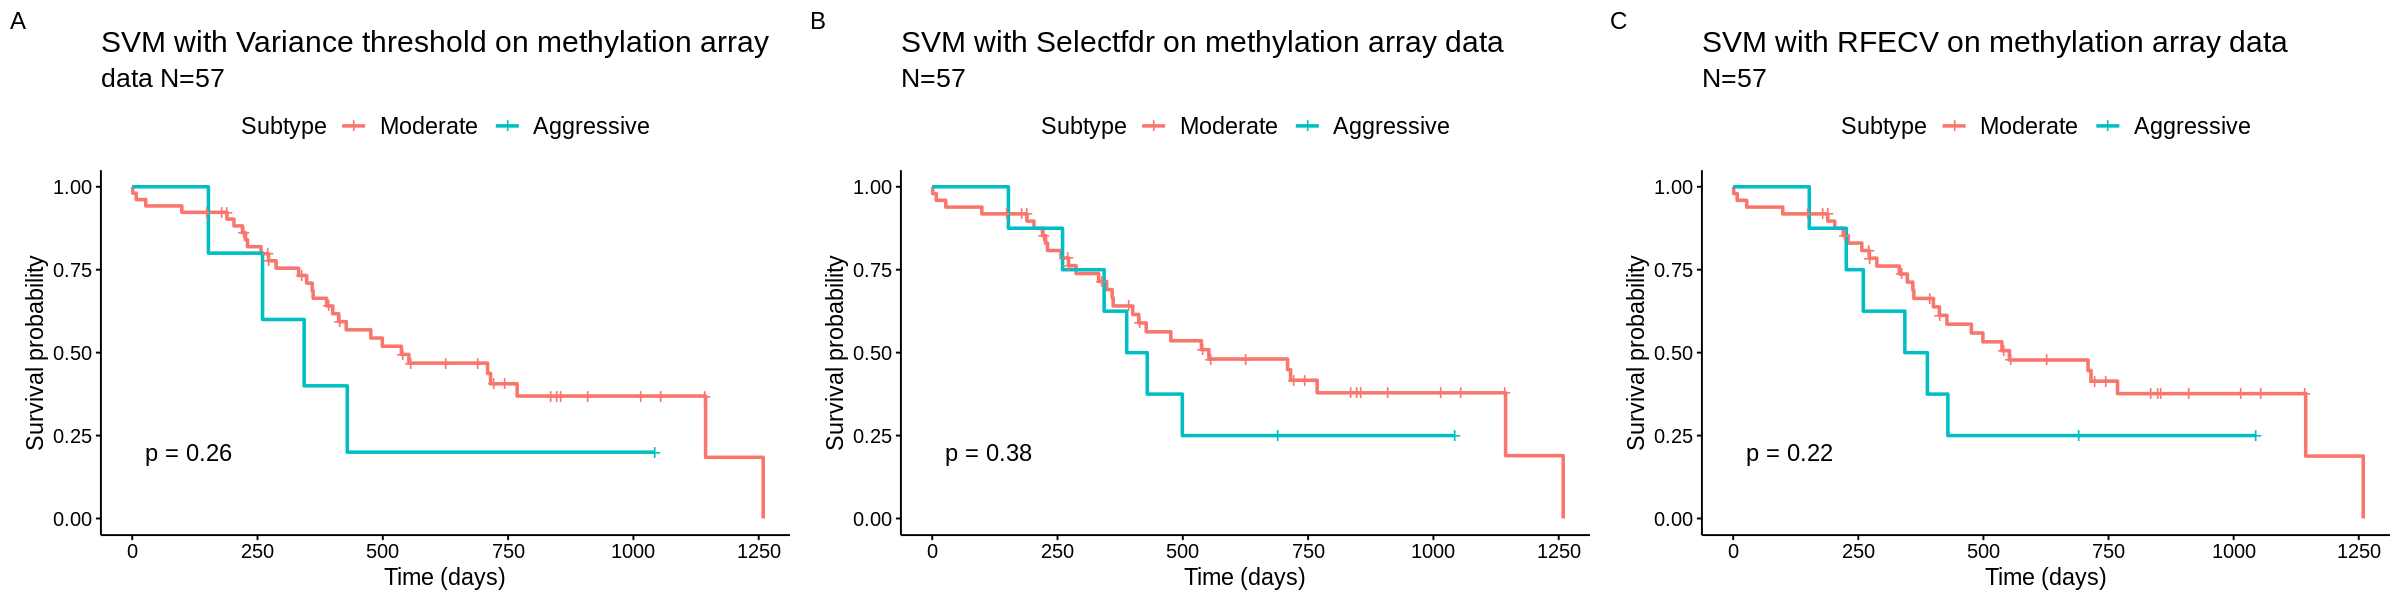

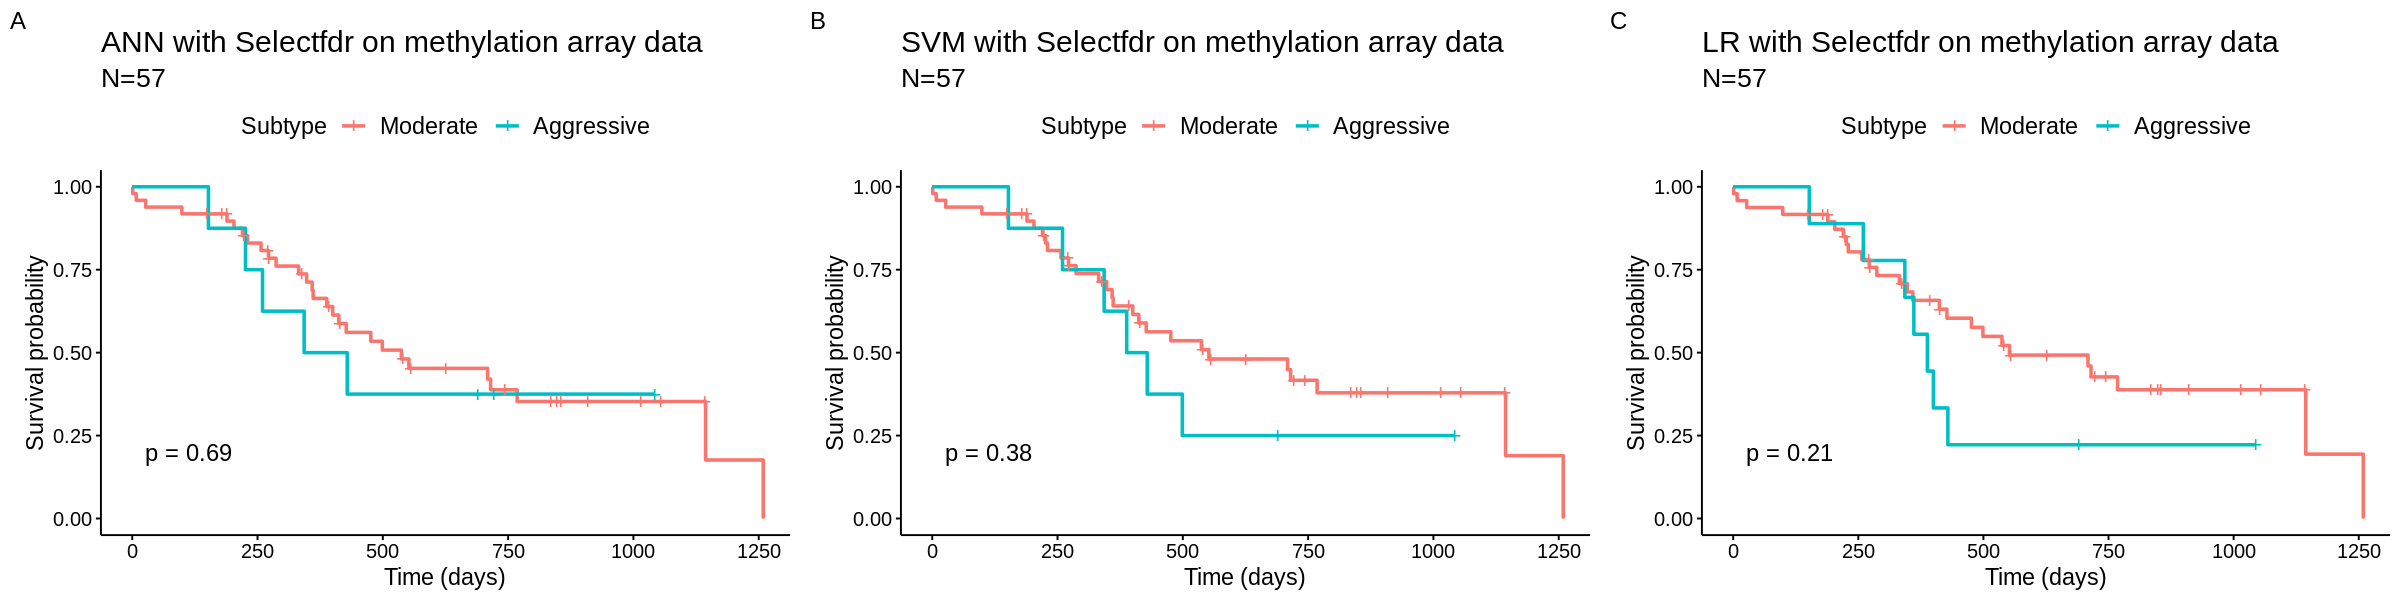

In [ ]:
options(repr.plot.width=20, repr.plot.height =5)
cox_model1 = survfit(Surv(donor_survival_time, donor_vital_status) ~ labelsv, clinical_array)
cox_model2 = survfit(Surv(donor_survival_time, donor_vital_status) ~ labelss, clinical_array)
cox_model3 = survfit(Surv(donor_survival_time, donor_vital_status) ~ labelsr, clinical_array)

cox_model4 = survfit(Surv(donor_survival_time, donor_vital_status) ~ labelslr, clinical_array)
cox_model5 = survfit(Surv(donor_survival_time, donor_vital_status) ~ labelss, clinical_array)
cox_model6 = survfit(Surv(donor_survival_time, donor_vital_status) ~ labelsann, clinical_array)

splots <- list()

splots[[1]] <- ggsurvplot(cox_model1 , data = clinical_array, pval = TRUE, legend.labs=c("Moderate", "Aggressive"), font.legend=14, font.x=14, font.y=14, font.title=18, font.subtitle=16, xlab='Time (days)', subtitle='data N=57', legend.title="Subtype", title="SVM with Variance threshold on methylation array") + labs(tag='A')
splots[[2]] <- ggsurvplot(cox_model2 , data = clinical_array, pval = TRUE, legend.labs=c("Moderate", "Aggressive"), font.legend=14, font.x=14, font.y=14, font.title=18, font.subtitle=16, xlab='Time (days)', subtitle='N=57', legend.title="Subtype", title="SVM with Selectfdr on methylation array data") + labs(tag='B')
splots[[3]] <- ggsurvplot(cox_model3 , data = clinical_array, pval = TRUE, legend.labs=c("Moderate", "Aggressive"), font.legend=14, font.x=14, font.y=14, font.title=18, font.subtitle=16, xlab='Time (days)', subtitle='N=57', legend.title="Subtype", title="SVM with RFECV on methylation array data") + labs(tag='C')

arrange_ggsurvplots(splots, print = TRUE,
  ncol = 3, nrow = 1)
splots <- list()
splots[[1]] <- ggsurvplot(cox_model6 , data = clinical_array, pval = TRUE, legend.labs=c("Moderate", "Aggressive"), font.legend=14, font.x=14, font.y=14, font.title=18, font.subtitle=16, xlab='Time (days)', subtitle='N=57', legend.title="Subtype", title="ANN with Selectfdr on methylation array data") + labs(tag='A')
splots[[2]] <- ggsurvplot(cox_model5 , data = clinical_array, pval = TRUE, legend.labs=c("Moderate", "Aggressive"), font.legend=14, font.x=14, font.y=14, font.title=18, font.subtitle=16, xlab='Time (days)', subtitle='N=57', legend.title="Subtype", title="SVM with Selectfdr on methylation array data") + labs(tag='B')
splots[[3]] <- ggsurvplot(cox_model4 , data = clinical_array, pval = TRUE, legend.labs=c("Moderate", "Aggressive"), font.legend=14, font.x=14, font.y=14, font.title=18, font.subtitle=16, xlab='Time (days)', subtitle='N=57', legend.title="Subtype", title="LR with Selectfdr on methylation array data") + labs(tag='C')
# Arrange multiple ggsurvplots and print the output
arrange_ggsurvplots(splots, print = TRUE,
  ncol = 3, nrow = 1)

## Nanostring

In [ ]:
labels_ann <- read.table('nano_RFECV_ANN_pred.csv', sep = ',', header=TRUE)
labels_selectfdr <- read.table('nano_RFECV_SVM_pred.csv', sep = ',', header=TRUE)
labels_lr <- read.table('nano_RFECV_LR_pred.csv', sep = ',', header=TRUE)

clinical_array <- read.table('nano_cli_logrank.csv', sep = ',', header=TRUE)

clinical_array$labelsann <- labels_ann$X0
clinical_array$labelss <- labels_selectfdr$Predicted
clinical_array$labelslr <- labels_lr$Predicted

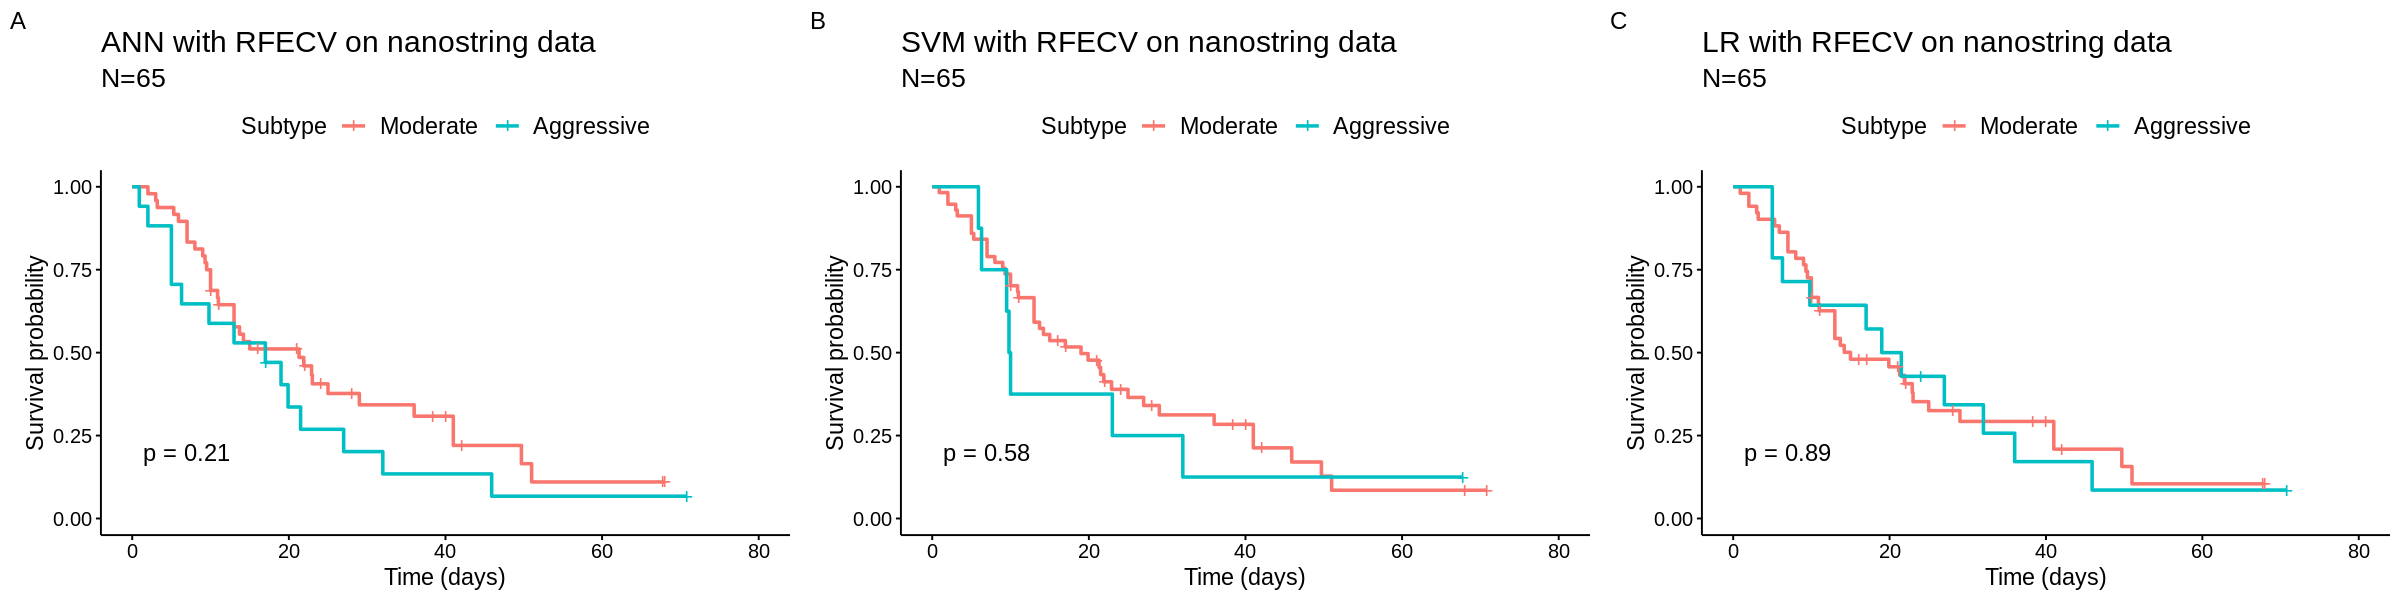

In [ ]:
options(repr.plot.width=20, repr.plot.height =5)
cox_model1 = survfit(Surv(time, vital_status) ~ labelsann, clinical_array)
cox_model2 = survfit(Surv(time, vital_status) ~ labelss, clinical_array)
cox_model3 = survfit(Surv(time, vital_status) ~ labelslr, clinical_array)

splots <- list()

splots[[1]] <- ggsurvplot(cox_model1 , data = clinical_array, pval = TRUE, legend.labs=c("Moderate", "Aggressive"), font.legend=14, font.x=14, font.y=14, font.title=18, font.subtitle=16, xlab='Time (days)', subtitle='N=65', legend.title="Subtype", title="ANN with RFECV on nanostring data") + labs(tag='A')
splots[[2]] <- ggsurvplot(cox_model2 , data = clinical_array, pval = TRUE, legend.labs=c("Moderate", "Aggressive"), font.legend=14, font.x=14, font.y=14, font.title=18, font.subtitle=16, xlab='Time (days)', subtitle='N=65', legend.title="Subtype", title="SVM with RFECV on nanostring data") + labs(tag='B')
splots[[3]] <- ggsurvplot(cox_model3 , data = clinical_array, pval = TRUE, legend.labs=c("Moderate", "Aggressive"), font.legend=14, font.x=14, font.y=14, font.title=18, font.subtitle=16, xlab='Time (days)', subtitle='N=65', legend.title="Subtype", title="LR with RFECV on nanostring data") + labs(tag='C')

# Arrange multiple ggsurvplots and print the output
arrange_ggsurvplots(splots, print = TRUE,
  ncol = 3, nrow = 1)

## Repeated nested cross validation plots

In [ ]:

Selectfdr <- read.table('selectfdr_mrna.csv', sep = ',', header=TRUE)
RFECV <- read.table('RFECV_mrna.csv', sep = ',', header=TRUE)
variance <- read.table('variance_mrna.csv', sep = ',', header=TRUE)

Selectfdr2 <- read.table('selectfdr_mrna_array.csv', sep = ',', header=TRUE)
RFECV2 <- read.table('RFECV_mrna_array.csv', sep = ',', header=TRUE)
variance2 <- read.table('variance_mrna_array.csv', sep = ',', header=TRUE)

Selectfdr3 <- read.table('selectfdr_methylation.csv', sep = ',', header=TRUE)
RFECV3 <- read.table('RFECV_methylation.csv', sep = ',', header=TRUE)
variance3 <- read.table('variance_methylation.csv', sep = ',', header=TRUE)

#mrna
test_scores_mrna <- data.frame(accuracy=c(Selectfdr), method=c(rep("Selectfdr", times =25)))
new_rows_RFECV <- data.frame(accuracy=c(RFECV), method=c(rep("RFECV", times =25)))
new_rows_variance <- data.frame(accuracy=c(variance), method=c(rep("Variance", times =25)))

#mrna_array
test_scores_mrna2 <- data.frame(accuracy=c(Selectfdr2), method=c(rep("Selectfdr", times =25)))
new_rows_RFECV2 <- data.frame(accuracy=c(RFECV2), method=c(rep("RFECV", times =25)))
new_rows_variance2 <- data.frame(accuracy=c(variance2), method=c(rep("Variance", times =25)))

#methylation
test_scores_mrna3 <- data.frame(accuracy=c(Selectfdr3), method=c(rep("Selectfdr", times =25)))
new_rows_RFECV3 <- data.frame(accuracy=c(RFECV3), method=c(rep("RFECV", times =25)))
new_rows_variance3 <- data.frame(accuracy=c(variance3), method=c(rep("Variance", times =25)))

# Add the new rows to the table
my_table <- rbind(test_scores_mrna, new_rows_RFECV, new_rows_variance, test_scores_mrna2, new_rows_RFECV2, new_rows_variance2, test_scores_mrna3, new_rows_RFECV3, new_rows_variance3)
my_table$data <- c(rep("mRNA-seq", times =75),rep("mRNA microarray", times=75), rep("methylation array", times=75))

In [ ]:
my_table$method <- as.factor(my_table$method)
my_table$data <- as.factor(my_table$data)
print(my_table)

In [ ]:
install.packages("ggpubr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’




In [ ]:
library(dplyr)
library(ggpubr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2



Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message in wilcox.test.default(c(0.9, 0.933333333333333, 0.8, 0.785714285714286, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.9, 0.933333333333333, 0.8, 0.785714285714286, :
“cannot compute exact p-value with zeroes”
Warning message in wilcox.test.default(c(0.933333333333333, 0.9, 0.8, 0.785714285714286, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.933333333333333, 0.9, 0.8, 0.785714285714286, :
“cannot compute exact p-value with zeroes”
Warning message in wilcox.test.default(c(0.933333333333333, 0.9, 0.8, 0.785714285714286, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.933333333333333, 0.9, 0.8, 0.785714285714286, :
“cannot compute exact p-value with zeroes”
Warning message in wilcox.test.default(c(0.833333333333333, 0.966666666666667, 0.83

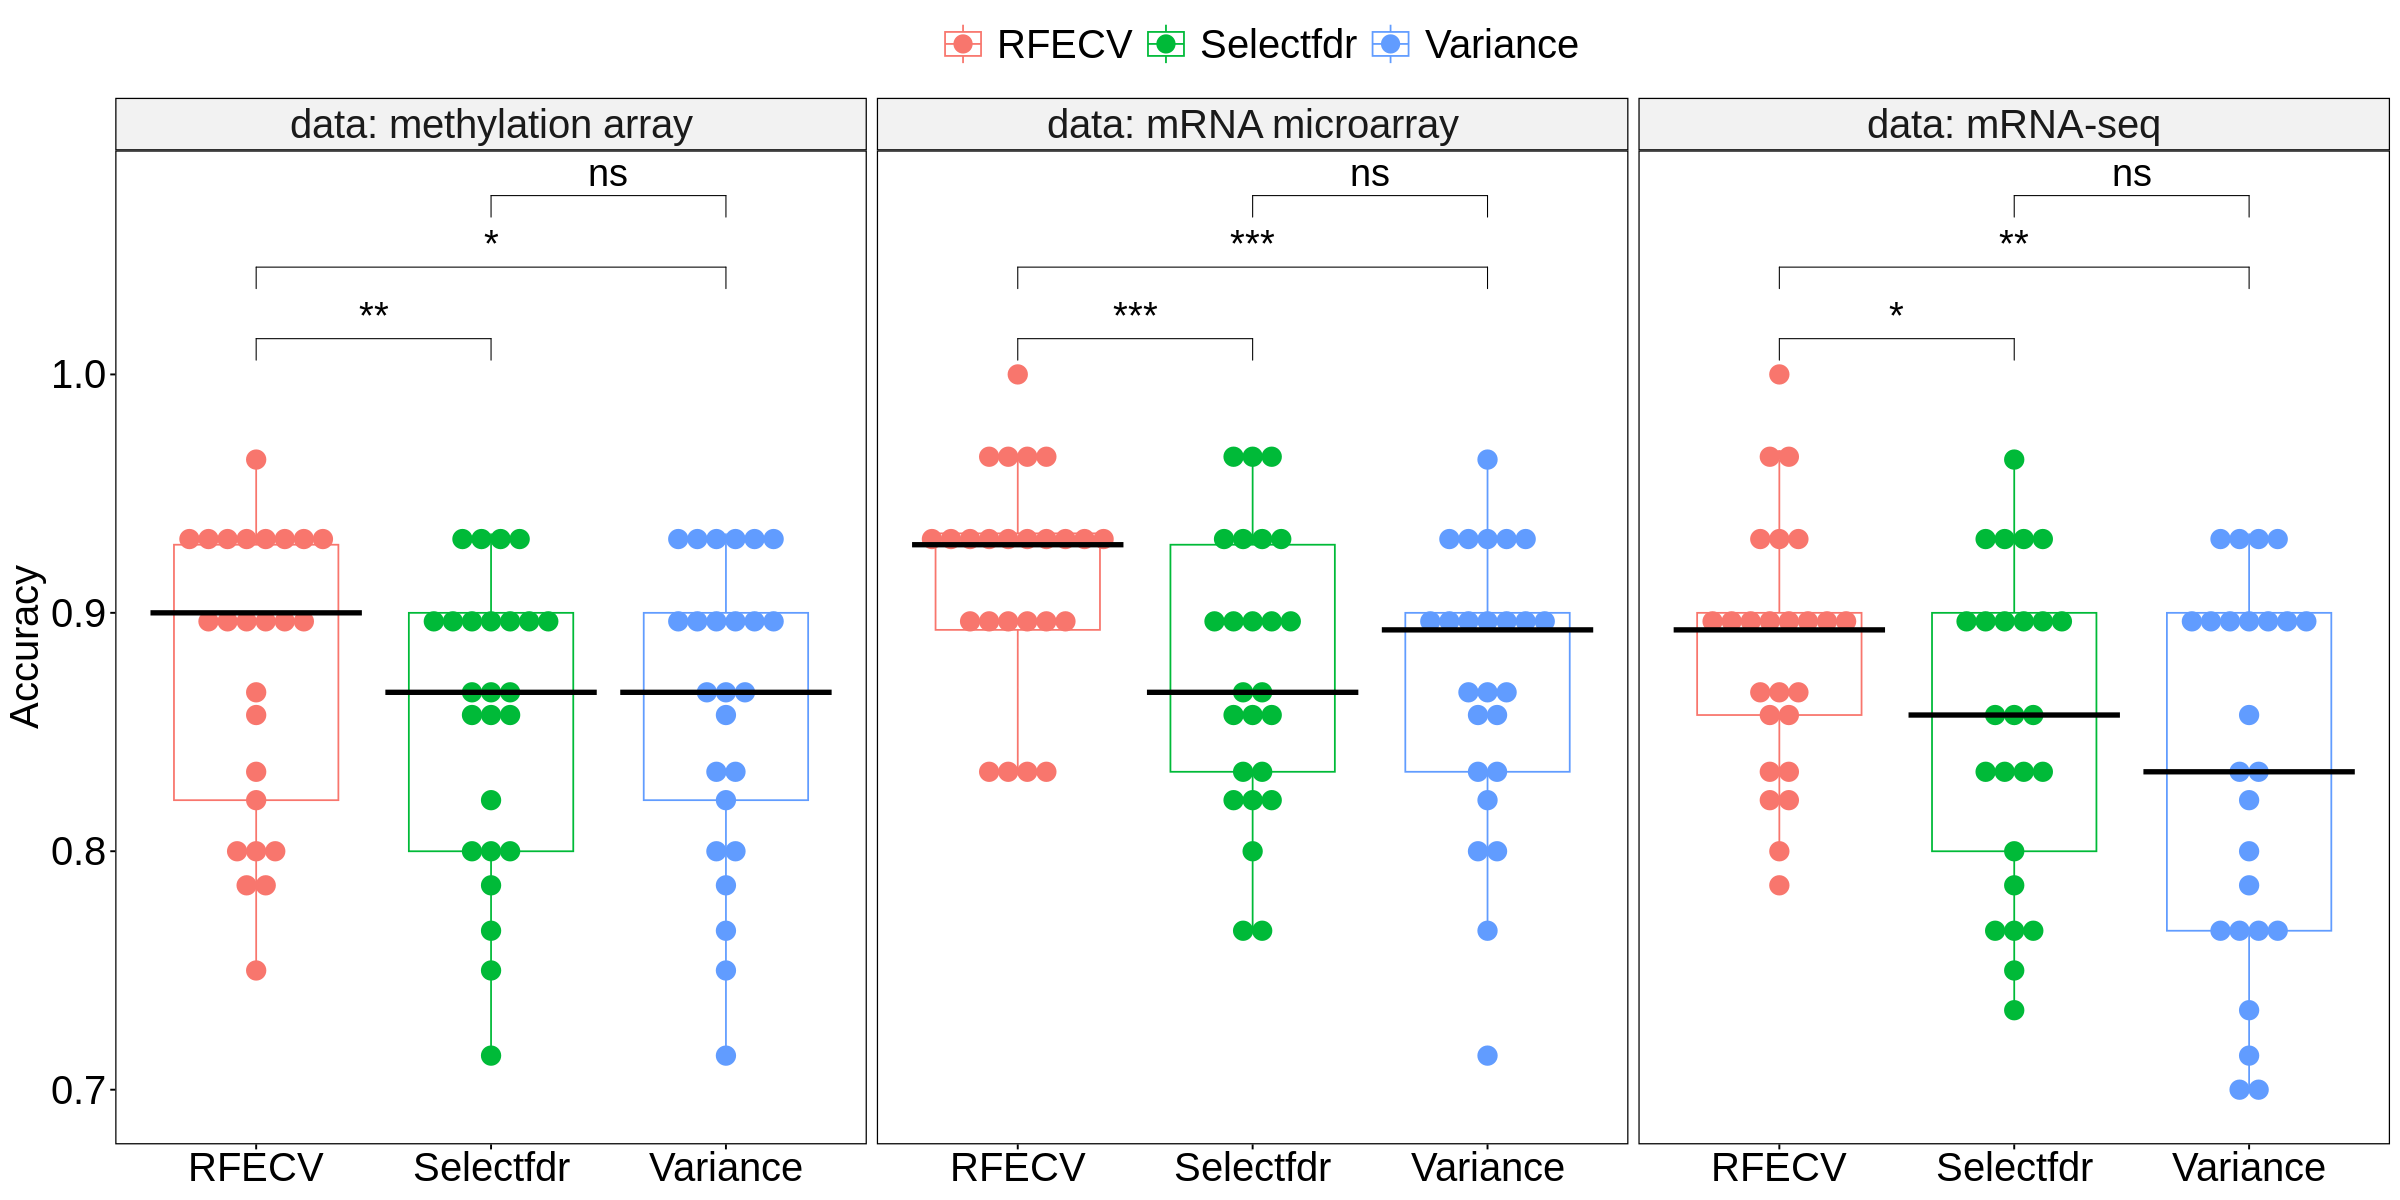

In [ ]:
# Box plot facetted by "dose"
options(repr.plot.width =20, repr.plot.height =10)
my_comparisons <- list( c("Selectfdr", "RFECV"), c("RFECV", "Variance"), c("Selectfdr", "Variance") )
p <- ggdotplot(my_table, x = "method", y = "test_score",
          fill = "method", color="method", pallete=c("#00AFBB", "#E7B800", "#FC4E07"),
          facet.by = "data", short.panel.labs = FALSE, binaxis='y', stackdir='center', position=position_dodge(0.9), binwidth = 0.008, add="boxplot")+   theme(axis.text=element_text(size = 24), axis.title.y = element_text(size = 24), axis.title.x = element_blank(), legend.text = element_text(size = 24),
        legend.key.size = unit(2, "lines"), legend.title=element_blank(), strip.text.x=element_text(size=24))+ labs(y="Accuracy") +
          stat_summary(fun = "median", colour = "black", size = 0.6, geom = "crossbar", position = position_dodge(0.9), show.legend = FALSE)
# Use only p.format as label. Remove method name.
p + stat_compare_means(comparison=my_comparisons, label = "p.signif", method="wilcox.test", paired=TRUE, label.y=c(1, 1.03, 1.06), size=8)

In [ ]:
SVM3 <- read.table('selectfdr_mrna.csv', sep = ',', header=TRUE)
ANN3 <- read.table('ANN_mrna.csv', sep = ',', header=TRUE)
LR3 <- read.table('LR_mrna.csv', sep = ',', header=TRUE)

SVM1 <- read.table('selectfdr_mrna_array.csv', sep = ',', header=TRUE)
ANN1 <- read.table('ANN_mrna_array.csv', sep = ',', header=TRUE)
LR1 <- read.table('LR_mrna_array.csv', sep = ',', header=TRUE)

SVM2 <- read.table('selectfdr_methylation.csv', sep = ',', header=TRUE)
ANN2 <- read.table('ANN_methylation.csv', sep = ',', header=TRUE)
LR2 <- read.table('LR_methylation.csv', sep = ',', header=TRUE)

SVM4 <- read.table('SVM_nano.csv', sep = ',', header=TRUE)
ANN4 <- read.table('ANN_nano.csv', sep = ',', header=TRUE)
LR4 <- read.table('LR_nano.csv', sep = ',', header=TRUE)

#mrna
test_scores_svm3 <- data.frame(accuracy=c(SVM3), method=c(rep("SVM", times =25)))
new_rows_ann3 <- data.frame(accuracy=c(ANN3), method=c(rep("ANN", times =25)))
new_rows_lr3 <- data.frame(accuracy=c(LR3), method=c(rep("LR", times =25)))

#mrna_array
test_scores_svm1 <- data.frame(accuracy=c(SVM1), method=c(rep("SVM", times =25)))
new_rows_ann1 <- data.frame(accuracy=c(ANN1), method=c(rep("ANN", times =25)))
new_rows_lr1 <- data.frame(accuracy=c(LR1), method=c(rep("LR", times =25)))

#methylation
test_scores_svm2 <- data.frame(accuracy=c(SVM2), method=c(rep("SVM", times =25)))
new_rows_ann2 <- data.frame(accuracy=c(ANN2), method=c(rep("ANN", times =25)))
new_rows_lr2 <- data.frame(accuracy=c(LR2), method=c(rep("LR", times =25)))

#nano
test_scores_svm4 <- data.frame(accuracy=c(SVM4), method=c(rep("SVM", times =25)))
new_rows_ann4 <- data.frame(accuracy=c(ANN4), method=c(rep("ANN", times =25)))
new_rows_lr4 <- data.frame(accuracy=c(LR4), method=c(rep("LR", times =25)))

# Add the new rows to the table
my_table <- rbind(test_scores_svm3, new_rows_ann3, new_rows_lr3, test_scores_svm1, new_rows_ann1, new_rows_lr1, test_scores_svm2, new_rows_ann2, new_rows_lr2,  test_scores_svm4, new_rows_ann4, new_rows_lr4)
my_table$data <- c(rep("mRNA-seq", times =75),rep("mRNA microarray", times=75), rep("methylation array", times=75), rep("nanostring", times=75))

my_table$method <- as.factor(my_table$method)
my_table$data <- as.factor(my_table$data)

In [ ]:
head(my_table)

Warning message in wilcox.test.default(c(0.866666666666667, 0.966666666666667, 0.8, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.866666666666667, 0.966666666666667, 0.8, :
“cannot compute exact p-value with zeroes”
Warning message in wilcox.test.default(c(0.933333333333333, 0.9, 0.8, 0.785714285714286, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.933333333333333, 0.9, 0.8, 0.785714285714286, :
“cannot compute exact p-value with zeroes”
Warning message in wilcox.test.default(c(0.933333333333333, 0.9, 0.8, 0.785714285714286, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.933333333333333, 0.9, 0.8, 0.785714285714286, :
“cannot compute exact p-value with zeroes”
Warning message in wilcox.test.default(c(0.833333333333333, 0.933333333333333, 0.766666666666667, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.833333333333333, 0.933333333

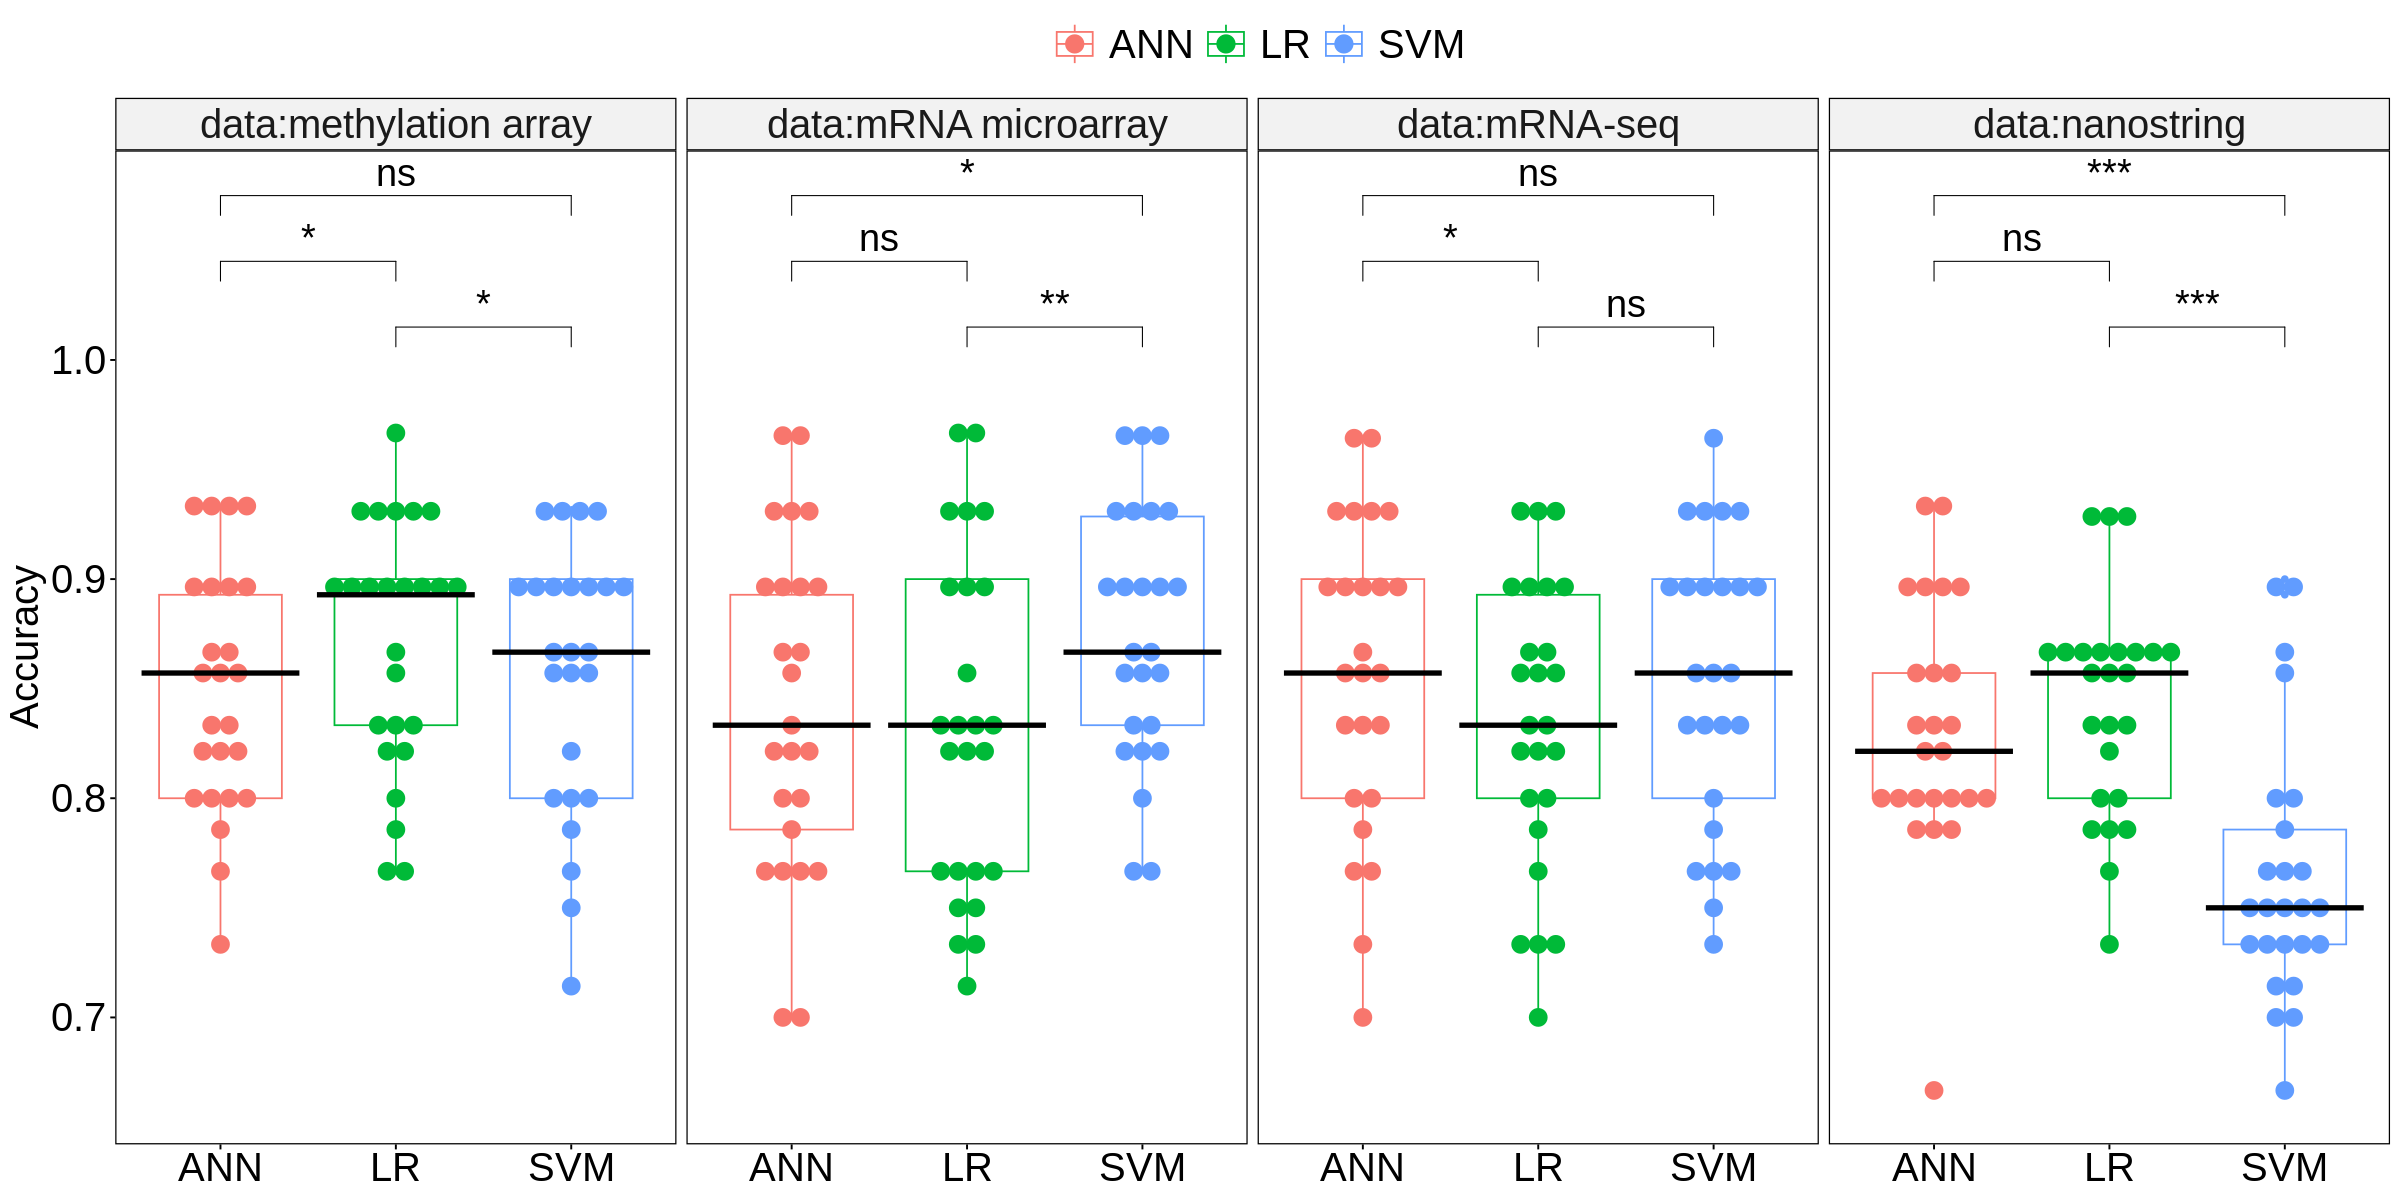

In [ ]:

options(repr.plot.width=20, repr.plot.height =10)
# New facet label names
data.labs <- c("data:methylation array", "data:mRNA-seq", "data:mRNA microarray", "data:nanostring")
names(data.labs) <- c("methylation array", "mRNA-seq", "mRNA microarray", "nanostring")
my_comparisons <- list( c("SVM", "LR"), c("LR", "ANN"), c("SVM", "ANN") )
p <- ggdotplot(my_table, x = "method", y = "test_score",
          fill = "method", color="method", pallete=c("#00AFBB", "#E7B800", "#FC4E07"),
          facet.by = "data", short.panel.labs = FALSE, binaxis='y', stackdir='center', position=position_dodge(0.9), binwidth = 0.008, add="boxplot")+
            theme(axis.text=element_text(size = 24), axis.title.y = element_text(size = 24), axis.title.x = element_blank(), legend.text = element_text(size = 24),
        legend.key.size = unit(2, "lines"), legend.title=element_blank(), strip.text.x=element_text(size=24))+ labs(y="Accuracy") +
          stat_summary(fun = "median", colour = "black", size = 0.6, geom = "crossbar", position = position_dodge(0.9), show.legend = FALSE) + facet_wrap(~ data, ncol=4, labeller = labeller(data = data.labs))
# Use only p.format as label. Remove method name.
p + stat_compare_means(comparison=my_comparisons, label = "p.signif", method="wilcox.test", paired=TRUE, label.y=c(1, 1.03, 1.06), size=8)